In [50]:
import numpy as np

In [51]:
filePath = 'data.txt'

data = np.genfromtxt(filePath, delimiter=',', skip_header=1)
np.shape(data)

(700, 152)

In [52]:
# transpose data to get features in columns and samples in rows
data_transpose = np.transpose(data)
data_list = data_transpose.tolist()

# now let's seperate data into "White Light Frame (WL)" and "NBI Frame (NBI)"
# 1 for WL and 2 for NBI
data_WL, data_NBI = [],[]
for i in range(len(data_list)):
    if data_list[i][1] == 1:
        data_WL.append(data_list[i])
    elif data_list[i][1] == 2:
        data_NBI.append(data_list[i])

# checking if the separation was done correctely
print(False in [row[1]==1 for row in data_WL])  # should be False
print(False in [row[1]==2 for row in data_NBI]) # should be False
print((len(data_WL)+len(data_NBI))==len(data_list)) # should be True

False
False
True


In [53]:
# separating features and targets out of data_WL and data_NBI
fea_WL = [row[2:] for row in data_WL]
class_WL = [row[0] for row in data_WL]

fea_NBI = [row[2:] for row in data_NBI]
class_NBI = [row[0] for row in data_NBI]

In [54]:
#SVM
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# X -> features, y -> label
X = np.array(fea_NBI + fea_WL)
y = np.array(class_NBI + class_WL)

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

explained variance ratio (first two components): [0.89186482 0.06848173]


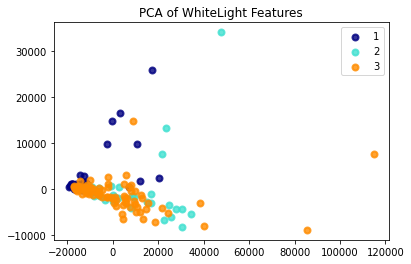

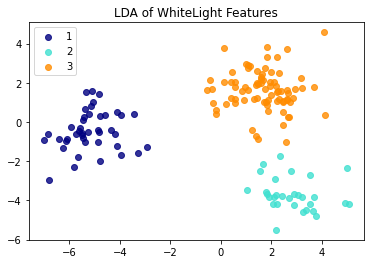

In [55]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# iris = datasets.load_iris()

# X = iris.data
# y = iris.target

X = np.array(fea_NBI + fea_WL)
y = np.array(class_NBI + class_WL)

# X = X_train
# y = y_train

# target_names = iris.target_names
target_names = ['1', '2', '3']

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

lda_test = LinearDiscriminantAnalysis(n_components=2)
X_r2_test = lda.fit(X_test, y_test).transform(X_test)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of WhiteLight Features")

plt.figure()
for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of WhiteLight Features")

plt.show()

In [57]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_r2_test)
 
# model accuracy for X_test 
accuracy = svm_model_linear.score(X_r2_test, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
print(cm)

ValueError: X.shape[1] = 2 should be equal to 698, the number of features at training time

In [27]:
# from numpy import mean
# from numpy import std
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import LeaveOneOut
# from sklearn.ensemble import RandomForestClassifier
# # X -> features, y -> label
# # X = fea_WL
# # y = class_WL
# X = X_r
# # create loocv procedure
# cv = LeaveOneOut()
# # create model
# model = RandomForestClassifier(random_state=1)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [29]:
cov = np.cov(fea_WL)

In [32]:
np.shape(cov)

(76, 76)

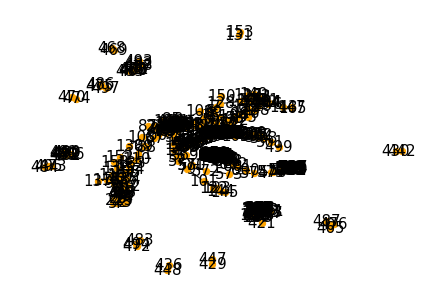

In [40]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# I build a data set: 10 individuals and 5 variables for each
ind1=[5,10,3,4,8,10,12,1,9,4]
ind5=[1,1,13,4,18,5,2,11,3,8]
df  = pd.DataFrame(fea_WL)
# df = pd.DataFrame({ 'A':ind1, 'B':ind1 + np.random.randint(10, size=(10)) , 'C':ind1 + np.random.randint(10, size=(10)) , 'D':ind1 + np.random.randint(5, size=(10)) , 'E':ind1 + np.random.randint(5, size=(10)), 'F':ind5, 'G':ind5 + np.random.randint(5, size=(10)) , 'H':ind5 + np.random.randint(5, size=(10)), 'I':ind5 + np.random.randint(5, size=(10)), 'J':ind5 + np.random.randint(5, size=(10))})
 
# Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.
corr = df.corr()
 
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.8) & (links['var1'] != links['var2']) ]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=40, edge_color='black', linewidths=1, font_size=15)

In [60]:
f = open('raw.txt', 'w')
# print('This message will be written to a file.', file=f)

In [61]:
print(cov, file = f)

In [62]:
cov

array([[2412974.11748307, 1569322.53995989, 1730696.45910517, ...,
        2802614.16719274,  808485.79917468, 1223883.81947396],
       [1569322.53995989, 1165783.92127269, 1222498.84602224, ...,
        1870450.33932488,  541559.68832237,  914576.88834315],
       [1730696.45910517, 1222498.84602224, 1319035.69646958, ...,
        2048827.06285169,  588032.37571851,  957600.98911345],
       ...,
       [2802614.16719274, 1870450.33932488, 2048827.06285169, ...,
        3275706.64234084,  941633.42087919, 1461816.84421105],
       [ 808485.79917468,  541559.68832237,  588032.37571851, ...,
         941633.42087919,  279319.06888304,  423888.49328774],
       [1223883.81947396,  914576.88834315,  957600.98911345, ...,
        1461816.84421105,  423888.49328774,  744480.29906874]])

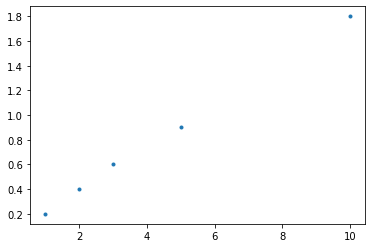

In [66]:
n = [1,2,3,5,10]
delta_l = [0.2,0.4,0.6,0.9, 1.8]
plt.plot(n, delta_l, '.')

In [69]:
from scipy.optimize import curve_fit
def objective(x, a):
	return a * x 

param, temp = curve_fit(objective, n, delta_l)

[0.18201439]


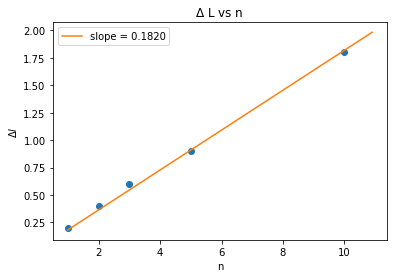

In [95]:
print(param)
plt.plot(n, delta_l, 'o')
x = np.arange(1,11, 0.1)
plt.plot(x, param*x, label= "slope = 0.1820" )
plt.xlabel('n')
plt.ylabel(r'$\Delta l$')
plt.legend()
plt.title(r'$\Delta$ L vs n ')
plt.savefig("delta_l_vs_n.png", dpi = 600)
plt.show()

In [77]:
x

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9])